# Perceptron

In [41]:
import numpy as np

class Perceptron:
    # eta: learning rate
    # n_iter: number of epochs
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # random number generator using np.random.RandomState class
        # used to initialize the weights
        rgen = np.random.RandomState(self.random_state)
        
        # generate random numbers from a normal (Gaussian distribution)
        # distribution with mean 0 and standard deviation 0.01
        # size: output shape of the array, equal to number of features in X
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [27]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

df = pd.read_csv(os.path.join(path, 'Iris.csv'), encoding='utf-8', index_col=0)
df.tail()

Path to dataset files: /Users/hieu/.cache/kagglehub/datasets/uciml/iris/versions/2


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


Extract text labels to integer labels as targets, 1st and 3rd feature columns (sepal length and petal length) as features.

In [32]:
df_setosa = df[df['Species'] == 'Iris-setosa']
df_versicolor = df[df['Species'] == 'Iris-versicolor']

print(df_setosa.head())
print(df_versicolor.head())

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
Id                                                                           
51            7.0           3.2            4.7           1.4  Iris-versicolor
52            6.4           3.2            4.5           1.5  Iris-versicolor
53            6.9           3.1            4.9           1.5  Iris-versicolor
54            5.5           2.3            4.0           1.3  Iris-versicolor
55            

Text labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


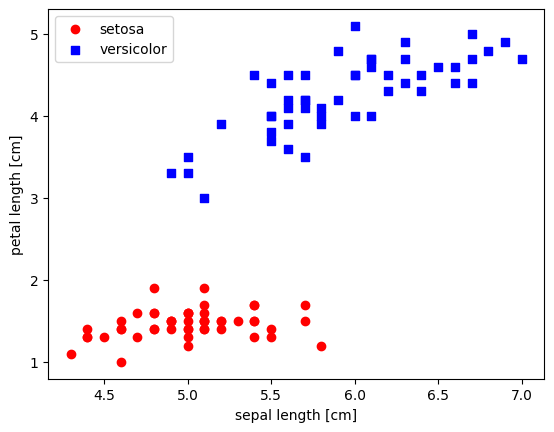

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# extract text labes
y = df.iloc[:, 4].values
print('Text labels:', np.unique(y))

# convert to integer labels
y = np.where(y == 'Iris-setosa', 0, 1)

# extract features (1st and 3rd column)
X = df.iloc[:, [0, 2]].values

df_setosa = df[df['Species'] == 'Iris-setosa']
df_versicolor = df[df['Species'] == 'Iris-versicolor']

plt.scatter(df_setosa['SepalLengthCm'], df_setosa['PetalLengthCm'], color='red', marker='o', label='setosa')
plt.scatter(df_versicolor['SepalLengthCm'], df_versicolor['PetalLengthCm'], color='blue', marker='s', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [38]:
print(len(X), len(y))

150 150


In [78]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (120, 2)
Test set shape: (30, 2)


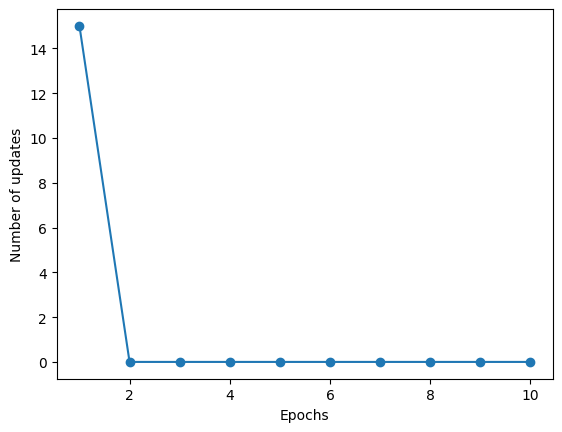

In [79]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X_train, y_train)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Perceptron converged after 2 epochs.

In [80]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1], alpha=0.8, cmap=cmap, marker=markers[i], label=j, c=colors[i])


/var/folders/v6/fmnfcvjs7y54r0___bhdm7fm0000gs/T/ipykernel_37666/3655313626.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == j, 0], X[y == j, 1], alpha=0.8, cmap=cmap, marker=markers[i], label=j, c=colors[i])


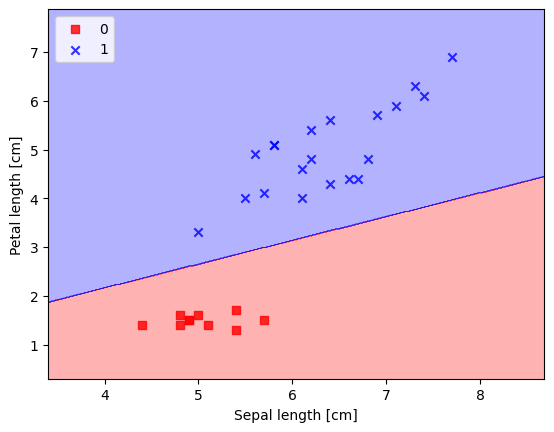

In [81]:
plot_decision_regions(X_test, y_test, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaptive linear neurons

In [82]:
import numpy as np

class AdalineGD:
    # eta: learning rate
    # n_iter: number of epochs
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        # random number generator using np.random.RandomState class
        # used to initialize the weights
        rgen = np.random.RandomState(self.random_state)
        
        # generate random numbers from a normal (Gaussian distribution)
        # distribution with mean 0 and standard deviation 0.01
        # size: output shape of the array, equal to number of features in X
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activate(net_input)
            errors = (y - output)
            
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
            self.w_
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activate(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activate(self.net_input(X)) >= 0.5, 1, 0)

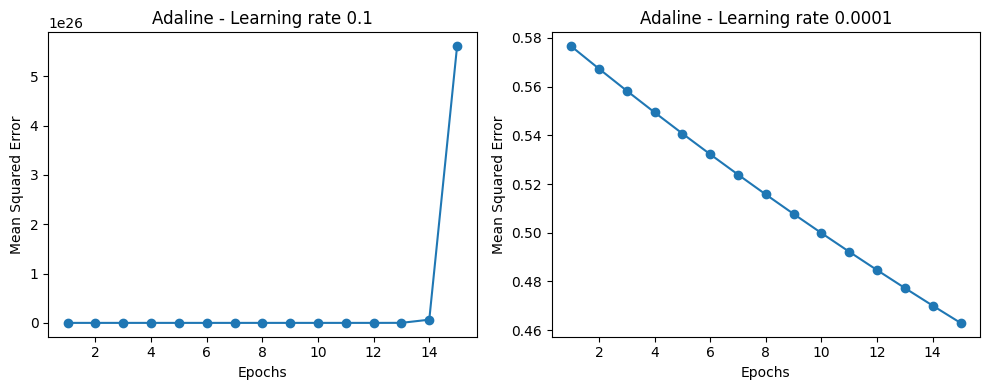

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def plot_adaline_learning_rates(X, y, Model, learning_rates, n_iter=15, figsize=(10, 4)):
    fig, ax = plt.subplots(nrows=1, ncols=len(learning_rates), figsize=figsize)
    
    for i, eta in enumerate(learning_rates):
        ada = Model(n_iter=n_iter, eta=eta).fit(X, y)
        
        if len(learning_rates) > 1:
            curr_ax = ax[i]
        else:
            curr_ax = ax
    
        curr_ax.plot(range(1, len(ada.losses_) + 1), ada.losses_, marker='o')
        curr_ax.set_ylabel('Mean Squared Error')
    
        curr_ax.set_xlabel('Epochs')
        curr_ax.set_title(f'Adaline - Learning rate {eta}')
    
    plt.tight_layout()
    plt.show()

# Usage
learning_rates = [0.1, 1e-4]
plot_adaline_learning_rates(X_train, y_train, AdalineGD, learning_rates)

Learning rate too big -> overshooting the global minimum, while too small -> a lot of epochs to converge

In [84]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.2, random_state=1)

In [87]:
ada_gd  = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_train_std, y_train_std)

/var/folders/v6/fmnfcvjs7y54r0___bhdm7fm0000gs/T/ipykernel_37666/3655313626.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == j, 0], X[y == j, 1], alpha=0.8, cmap=cmap, marker=markers[i], label=j, c=colors[i])


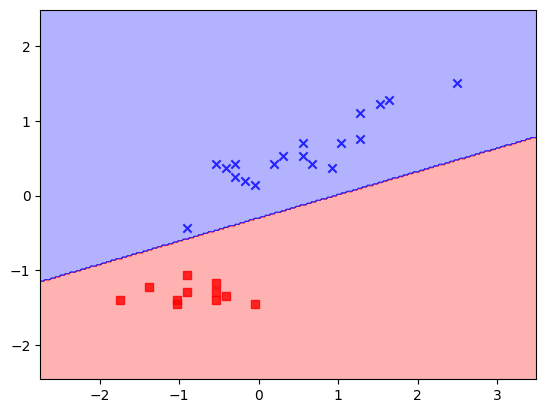

In [88]:
plot_decision_regions(X_test_std, y_test_std, classifier=ada_gd)

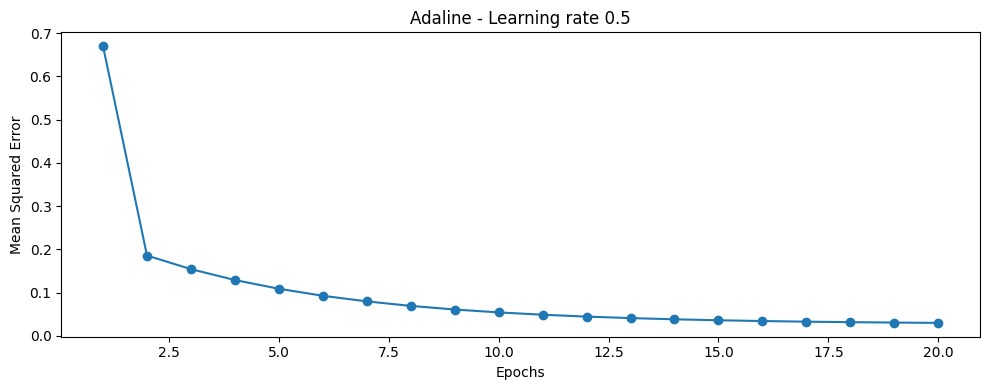

In [90]:
plot_adaline_learning_rates(X_train_std, y_train_std, AdalineGD, learning_rates=[0.5], n_iter=20)

## Stochastic gradient descent

In [64]:
import numpy as np

class AdalineSGD:
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        
        # decide whether to shuffle the training data
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            # shuffle training data if True
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                loss = self._update_weights(xi, target)
                losses.append(loss)
                
            # keep track of average losses
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
            
        # check if `y` contains multiple or single sample
        # y.ravel() flattens into 1D array
        # y.ravel().shape[0] returns number of samples (array length)
        # handle mini-batch updates
        # used in case of batch gradient descent
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            # update weights on the entire training set
            # used in case of full batch gradient descent
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * error
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

/var/folders/v6/fmnfcvjs7y54r0___bhdm7fm0000gs/T/ipykernel_37666/3655313626.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == j, 0], X[y == j, 1], alpha=0.8, cmap=cmap, marker=markers[i], label=j, c=colors[i])


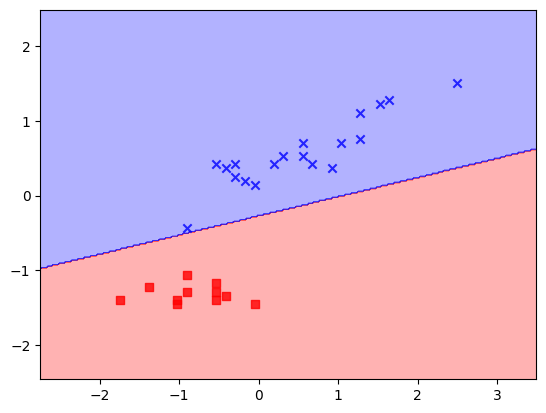

In [91]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_train_std, y_train_std)
plot_decision_regions(X_test_std, y_test_std, classifier=ada_sgd)

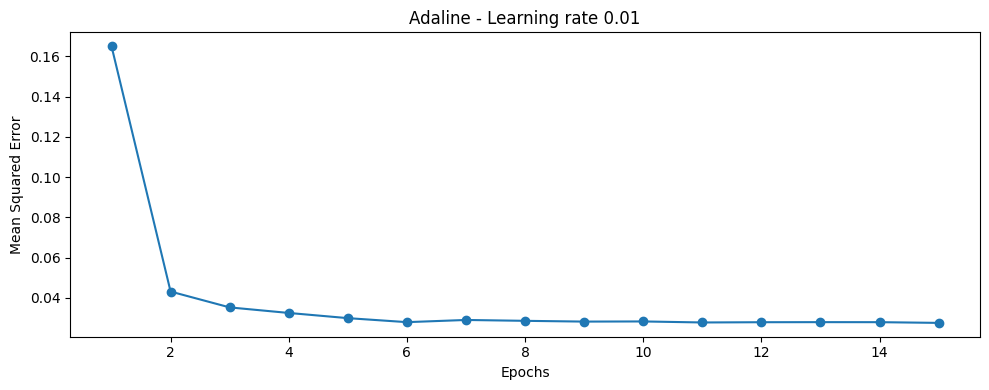

In [93]:
plot_adaline_learning_rates(X_train_std, y_train_std, AdalineSGD, learning_rates=[0.01])

The main differences between Adaline with Gradient Descent (GD) and Adaline with Stochastic Gradient Descent (SGD) are:

1. Weight Update Frequency:
   - AdalineGD: Updates weights once per epoch, after calculating the gradient based on all training samples.
   - AdalineSGD: Updates weights after each individual sample or mini-batch.

2. Convergence:
   - AdalineGD: Generally smoother convergence, but can be slower, especially for large datasets.
   - AdalineSGD: Faster convergence, especially for large datasets, but with more fluctuations in the cost function.

3. Computational Efficiency:
   - AdalineGD: Computationally expensive for large datasets as it processes all samples before each update.
   - AdalineSGD: More efficient for large datasets as it updates weights more frequently.

4. Memory Usage:
   - AdalineGD: Requires the entire dataset to be in memory.
   - AdalineSGD: Can work with partial data, making it suitable for online learning or large datasets.

5. Randomization:
   - AdalineGD: Typically processes samples in a fixed order.
   - AdalineSGD: Often shuffles the training data before each epoch to prevent cycles in weight updates.

6. Learning Rate:
   - AdalineGD: Can often use a larger learning rate.
   - AdalineSGD: Usually requires a smaller learning rate to manage the noise in individual sample gradients.

7. Implementation:
   - AdalineGD: Simpler implementation, typically with a single loop over epochs.
   - AdalineSGD: More complex implementation, often with nested loops (epochs and samples).

8. Batch vs. Online Learning:
   - AdalineGD: Batch learning only.
   - AdalineSGD: Supports both batch and online learning (through methods like `partial_fit`).

9. Suitability for Different Types of Problems:
   - AdalineGD: Better for smaller datasets or when exact gradients are required.
   - AdalineSGD: Better for large datasets, online learning, or when approximate solutions are acceptable.

These differences make AdalineSGD generally more flexible and scalable, especially for large-scale machine learning problems, while AdalineGD might be preferred for smaller, more controlled learning scenarios where stability is prioritized over speed.